In [1]:
import math
import json
import numpy as np
import pandas as pd
import networkx as nx
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from IPython.display import Image


names = ('airline,airline_id,'
         'source,source_id,'
         'dest,dest_id,'
         'codeshare,stops,equipment').split(',')
routes = pd.read_csv(
    'https://github.com/ipython-books/'
    'cookbook-2nd-data/blob/master/'
    'routes.dat?raw=true',
    names=names,
    header=None)

names = ('id,name,city,country,iata,icao,lat,lon,'
         'alt,timezone,dst,tz,type,source').split(',')
airports = pd.read_csv(
    'https://github.com/ipython-books/'
    'cookbook-2nd-data/blob/master/'
    'airports.dat?raw=true',
    header=None,
    names=names,
    index_col=4,
    na_values='\\N')
airports_us = airports[airports['country'] ==
                       'United States']

routes_us = routes[
    routes['source'].isin(airports_us.index) &
    routes['dest'].isin(airports_us.index)]

edges = routes_us[['source', 'dest']].values

g = nx.from_edgelist(edges)

largest_cc = max(nx.connected_components(g), key=len)
G = g.subgraph(largest_cc).copy()
A = nx.to_numpy_array(G)



In [5]:
from core_periphery import KM_Config
import numpy as np
import networkx as nx
import pygad
from core_periphery import Stochastic_Block_Model



print("*** KM_ER")
model = KM_Config(G_k, A_k)
c, x, Qcp = model.optimize( max_updates=1000)

*** KM_ER


In [2]:
from core_periphery import Surprise
import networkx as nx
# Example usage


model = Surprise(G, A)
best_x, core_set, best_q = model.core_periphery_optimization(iterations=100)

print("Best division (0: periphery, 1: core):", core_set)
print("Best MEH value:", best_q)


/Users/jeongjin/Desktop/Work/cp-explainer/core_periphery.py:1396: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  l_bullet = len([edge for edge in G.edges if edge[0] in group_1 and edge[1] in group_1])
/Users/jeongjin/Desktop/Work/cp-explainer/core_periphery.py:1397: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  l_circle = len([edge for edge in G.edges if edge[0] in group_2 and edge[1] in group_2])
/Users/jeongjin/Desktop/Work/cp-explainer/core_periphery.py:1407: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if u in group_1 and v in group_1:
/Users/jeongjin/Desktop/Work/cp-explainer/core_periphery.py:1409: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif u in grou

In [45]:
import networkx as nx
import matplotlib.pyplot as plt


def plot_core_periphery_graph(G, core_indices):
    # Get the node labels (strings) from the graph using the indices
    core_nodes = [list(G.nodes)[i] for i in core_indices]
    
    # Set node color: 'red' for core nodes and 'blue' for periphery nodes
    node_colors = ['red' if node in core_nodes else 'blue' for node in G.nodes]
    
    # Draw the graph
    pos = nx.spring_layout(G)  # spring layout for better visualization
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=10, font_size=0, font_color='white')
    
    # Highlight core nodes with larger size
    nx.draw_networkx_nodes(G, pos, nodelist=core_nodes, node_color='red', node_size=30)

    plt.show()


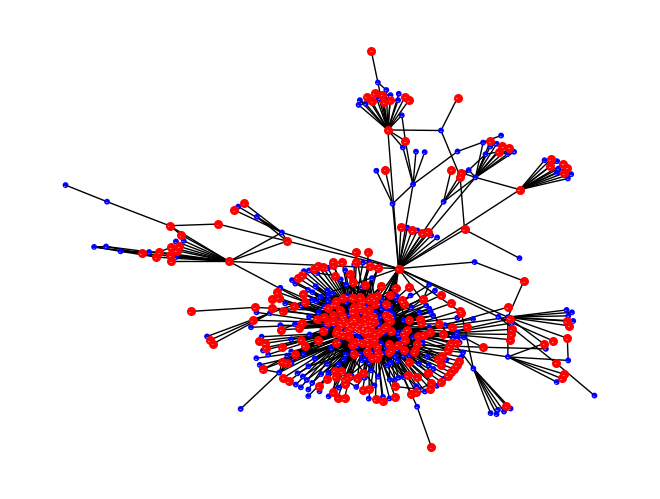

In [46]:
plot_core_periphery_graph(G, set(core_set))

In [4]:
G_k = nx.karate_club_graph()
A_k = nx.to_numpy_array(G_k)

model = Surprise(G_k, A_k)
best_xk, core_setk, best_qk = model.core_periphery_optimization(iterations=100)

plot_core_periphery_graph(G_k, set(core_setk))

NameError: name 'Surprise' is not defined

In [7]:
G.neighbors("ADQ")

In [6]:
G.nodes

NodeView(('ADQ', 'KLN', 'KYK', 'BRL', 'ORD', 'STL', 'DEC', 'JBR', 'KTN', 'MTM', 'ATL', 'LWB', 'MCN', 'MEI', 'MSL', 'PIB', 'TUP', 'EYW', 'FLL', 'RSW', 'TPA', 'MCO', 'GLH', 'GNV', 'JAX', 'PNS', 'TLH', 'PBI', 'LAS', 'LAX', 'MCG', 'NIB', 'TLJ', 'AKP', 'FAI', 'BTT', 'CEM', 'IRC', 'CIK', 'FYU', 'MLY', 'WBQ', 'BET', 'EEK', 'KPN', 'KWN', 'KWT', 'MLL', 'NME', 'WNA', 'CYF', 'KKH', 'KWK', 'OOK', 'PKA', 'PTU', 'ABL', 'OTZ', 'SHG', 'ANC', 'AIN', 'ATK', 'BRW', 'ANI', 'CDV', 'ENA', 'HOM', 'KSM', 'UNK', 'VDZ', 'HCR', 'KLG', 'RSH', 'SHX', 'ANV', 'AUK', 'EMK', 'HPB', 'KUK', 'VAK', 'BKC', 'DRG', 'NUI', 'PIZ', 'BTI', 'SCC', 'ELI', 'KKA', 'OME', 'KOT', 'GAL', 'RBY', 'HSL', 'KAL', 'NUL', 'GAM', 'SVA', 'GLV', 'WMO', 'SCM', 'KYU', 'IAN', 'ORV', 'SKK', 'MOU', 'KTS', 'TLA', 'WAA', 'KVL', 'TOG', 'MYU', 'OBU', 'SHH', 'WLK', 'WTK', 'SLQ', 'SMK', 'AKK', 'LUR', 'TNC', 'AET', 'HUS', 'ARC', 'VEE', 'AZO', 'CHA', 'CID', 'CRW', 'CVG', 'EVV', 'FWA', 'GSO', 'GSP', 'LAN', 'LEX', 'MBS', 'MSP', 'ROA', 'SYR', 'TYS', 'XNA', 'DT